# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [8]:
# Codewrite cell (Use as you wish)

colours = ['#E92816','#16E928','#1F5AF0']
data_A = np.load(f'Data/Dataset_A.npy')

def dist_sq(a,b):
    return (a[0]-b[0])**2+(a[1]-b[1])**2

def closest_cluster(point, cluster_centers):
    arr = [dist_sq(point,c) for c in cluster_centers]
    fin = np.argmin(arr)
    mini = arr[fin]
    return fin,mini

def kmeans_algo(data, k=3, iter=100):
    init = data[np.random.choice(len(data),k)]
    dist_to_cc = -1*np.ones(len(data))
    labels = -1*np.ones(len(data))
    iner = []
    

    for t in range(iter):
        inertia = 0
        for i,v in enumerate(data):
            labels[i], dist_to_cc[i] = closest_cluster(v,init)
            inertia+=dist_to_cc[i]
        iner.append(inertia)

        if t>3 and iner[t]==iner[t-1] and iner[t-1]==iner[t-2]:
            break

        init = [np.mean(data[labels==i],axis=0).tolist() for i in range(k)]
        # print(init)

    # plt.plot(iner)
    return labels, init, inertia

def adj_func(x1, x2, g):
    return np.exp(-g*np.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2))

def spectral_clustering(data, k, n, gamma):
    A = np.ones((len(data),len(data)))
    for i in range(1,len(data)):
        for j in range(i):
            A[i][j] = adj_func(data[i], data[j], g=gamma)
            A[j][i] = A[i][j]

    D = np.diag(np.sum(A, axis=1))

    L = D-A

    eig_vecs = practical_eigen_symmetric(L)[1][:,:n]
    y_preds = KMeans(n_clusters=k).fit_predict(eig_vecs)

    return y_preds

def plot_class_data(data, labels, cluster_centers=None, method = 'Spectral'):
    plt.figure(figsize=[6,6])
    plt.scatter(data[:,0],data[:,1],c=list(map(lambda ni: colours[int(ni)], labels)))
    if cluster_centers != None:
        x_c, y_c = zip(*cluster_centers)
        plt.scatter(x_c,y_c,marker='x',s=200,c='black')
    plt.xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
    plt.ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
    return

def plot_clusterer(data, method='Spectral', k=None, n=None, gamma=None):
    if method=='Spectral':
        plot_class_data(data_A, spectral_clustering(data_A, k=k, n=n, gamma=gamma))
        plt.title(f'Spectral Clustering on Dataset A | $ \gamma={gamma}$, $n={n}$, $k={k}$', font='Times New Roman', fontsize=16)
        plt.show()
    elif method=='KMeans':
        plot_class_data(data, kmeans_algo(data, k=k)[0])
        plt.title(f'KMeans Clustering on Dataset A | $k={k}$', font='Times New Roman', fontsize=20)
        plt.show()
    else:
        print('No Such Method !')
    return

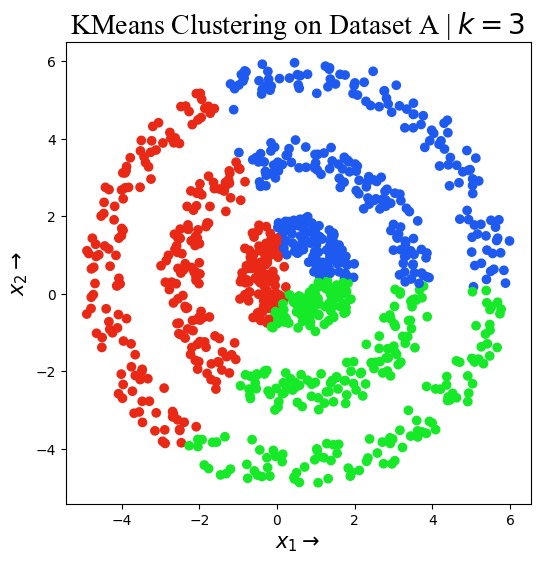

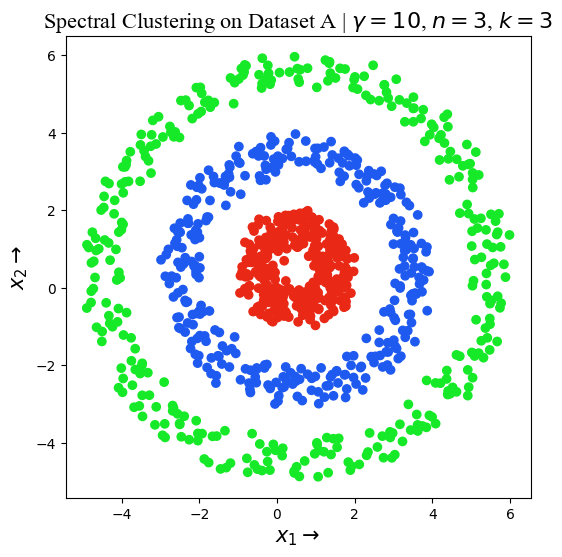

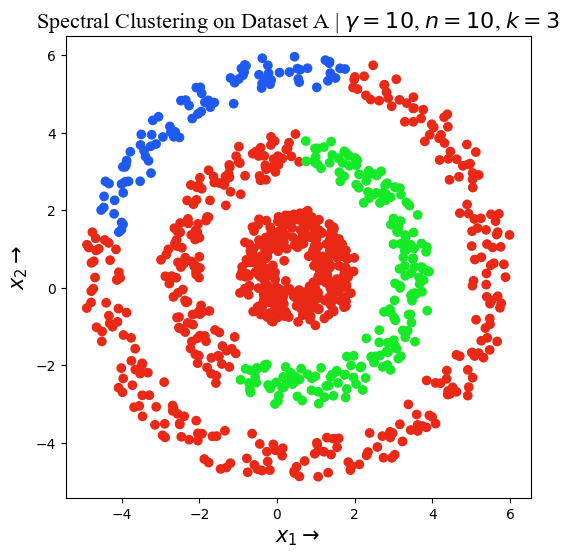

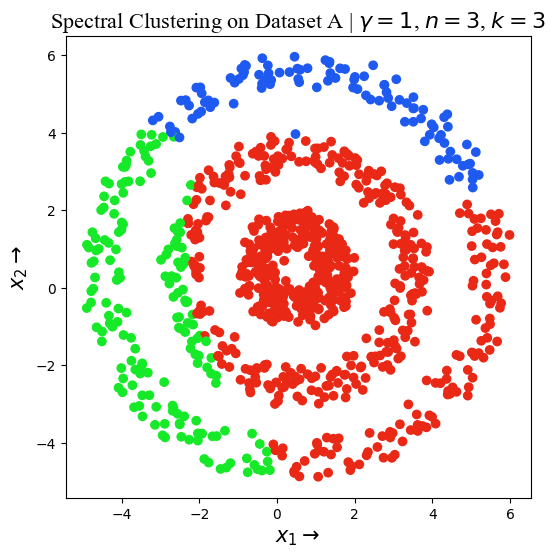

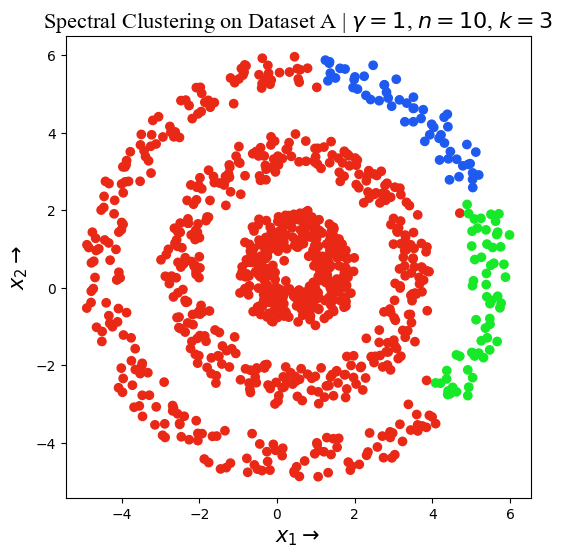

In [9]:
# Codewrite cell (Get the 5 scatter plots here)

k_vals = [3,3,3,3]
n_vals = [3,10,3,10]
gamma_vals = [10,10,1,1]

plot_clusterer(data_A, method='KMeans', k=3)
for i in range(4):
    plot_clusterer(data_A, method='Spectral', k=k_vals[i], n=n_vals[i], gamma=gamma_vals[i])

---

Observations :

1. As can be seen from the first plot, KMeans does not cluster the dataset as required, and this is to be expected since KMeans does not work when multiple clusters have overlapping cluster centers.
2. Spectral Clustering works better on datasets that are non-convex, like the one given in Dataset_A.
3. Spectral Clustering involves a similarity graph, so the data points in a single cluster are better connected and this can be observed in the cluster classification in SPectral Clustering, whereas this does not happen with KMeans.
4. Low $\gamma$ values lead to the similarity graph getting more diluted, and thus clustering becomes less accurate.
5. Large $n$ values lead to a lot of over-fitting as a lot of unnecesary noise is taken into consideration too. If $n$ is too low, not enough data is given through the selected eigenvectors.
6. The optimal values were found to be $\gamma = 10,$ $n=3,$ $k=3$.

---

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [11]:
# Codewrite cell (Use as you wish)  
data_B = np.load(f'Data/Dataset_B.npy')

def plot_dbscan(data, eps, min_samples):
    plot_class_data(data, DBSCAN(eps=eps, min_samples=min_samples).fit(data).labels_, col='')
    plt.title(f'DBScan Clustering on Dataset B $|$ $eps={eps}$, $min\_ samples={min_samples}$', font='Times New Roman', fontsize=20)
    plt.show()
    return

<Figure size 1000x1000 with 0 Axes>

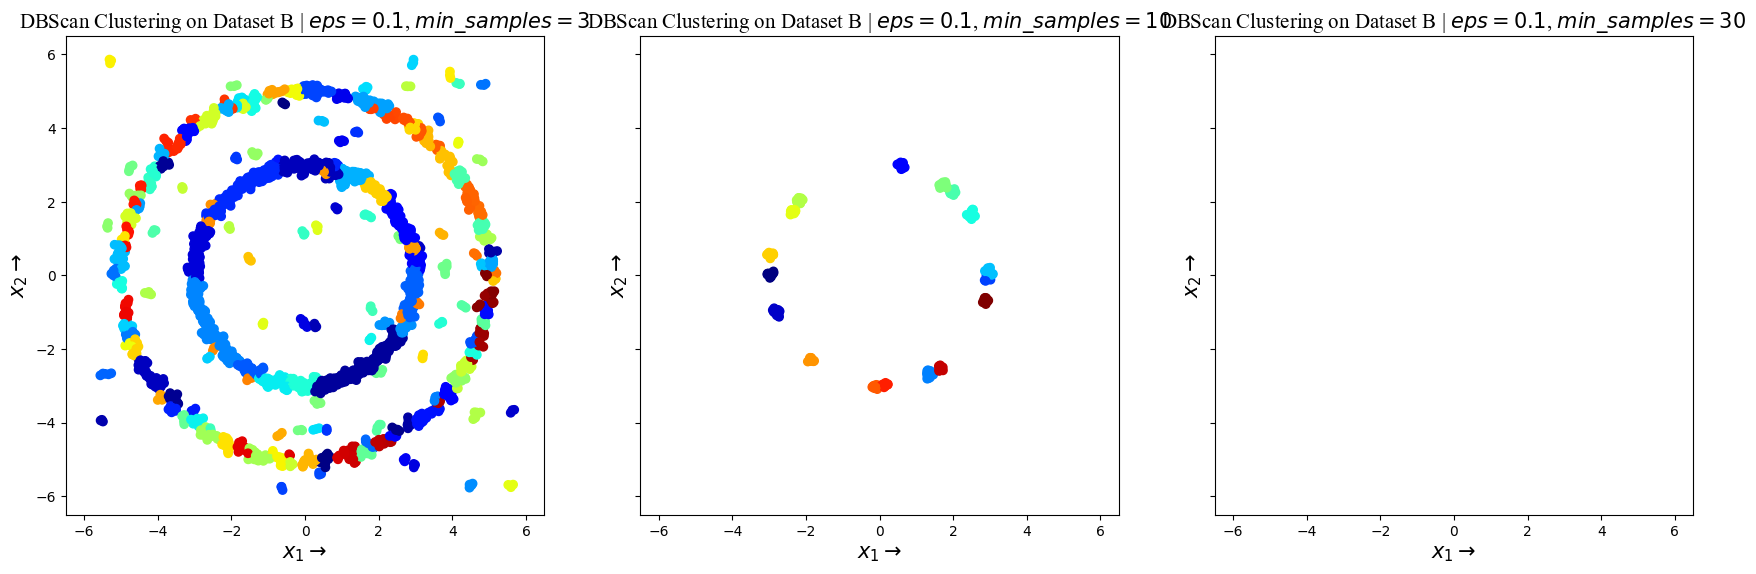

<Figure size 1000x1000 with 0 Axes>

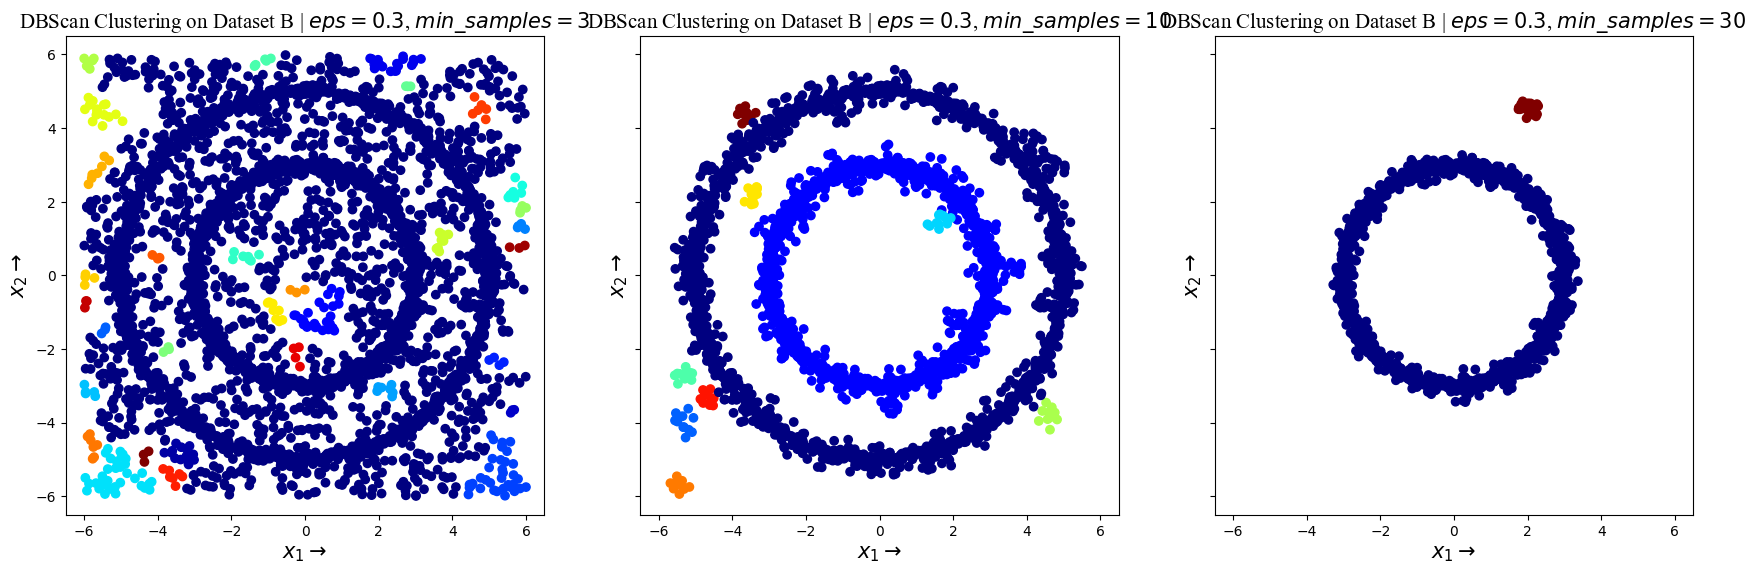

<Figure size 1000x1000 with 0 Axes>

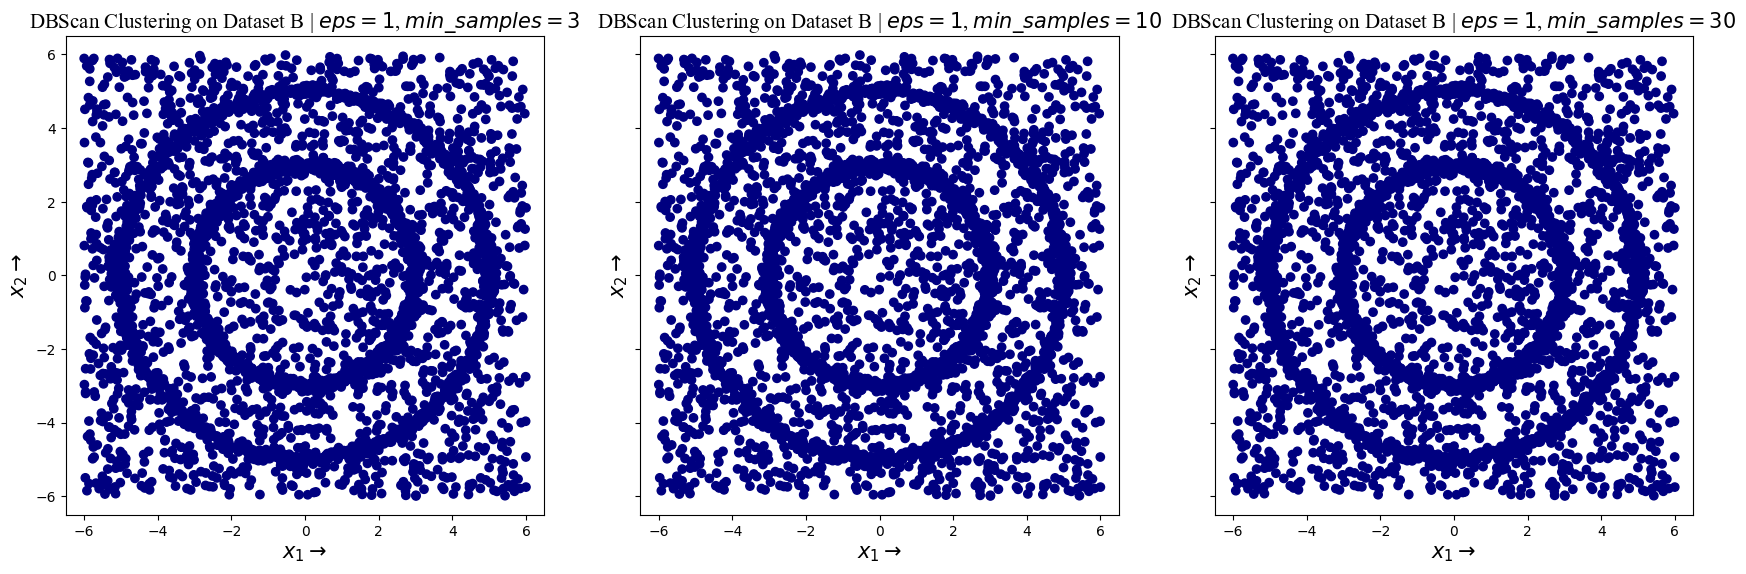

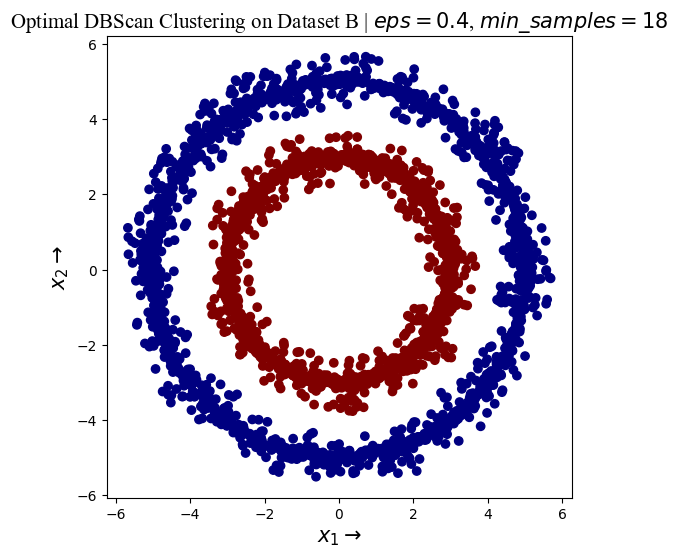

In [20]:
# Codewrite cell. Get the 9 plots here.
eps_vals = [0.1,0.3,1]
min_samples_vals = [3,10,30]

for eps in eps_vals:
    plt.figure(figsize=[10,10])
    f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(21,7))
    axlist = (ax1,ax2,ax3)
    zlist = [DBSCAN(eps = eps, min_samples=min_samp).fit(data_B).labels_ for min_samp in min_samples_vals]

    for i,(t,z) in enumerate(zip(axlist,zlist)):
        t.scatter(data_B[zlist[i]!=-1][:,0], data_B[zlist[i]!=-1][:,1], c=zlist[i][zlist[i]!=-1],cmap='jet')
        t.set_title(f'DBScan Clustering on Dataset B | $eps={eps}$, $min\_ samples={min_samples_vals[i]}$', font='Times New Roman', fontsize=15)
        t.set_xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
        t.set_ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
        t.set_xlim(-6.5,6.5)
        t.set_ylim(-6.5,6.5)
        t.set_aspect('equal')

    plt.show()

plt.figure(figsize=[6,6])
z_optimal = DBSCAN(eps = 0.4, min_samples=18).fit(data_B).labels_
plt.scatter(data_B[z_optimal!=-1][:,0], data_B[z_optimal!=-1][:,1], c=z_optimal[z_optimal!=-1],cmap='jet')
plt.title(f'Optimal DBScan Clustering on Dataset B | $eps={0.4}$, $min\_ samples={18}$', font='Times New Roman', fontsize=15)
plt.xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
plt.ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
plt.show()


---

Observations :

1. Explored the DBScan function in sklearn with different eps values and min_samples values.
2. If $eps<=0.1$, most of the points are considered as outliers, even those close to actual clusters.
3. If $eps>=1$, all points in the dataset are considered to be part of a single large cluster, which does not help us cluster the data accurately.
4. If $min\_ samples<=3$, actual clusters get divided up into smaller cluters very easily.
5. If $min\_ samples>=30$, most actual clusters are considered as outliers due to them not being sufficiently large.
6. Thus, optimal values were found to be $eps=0.3$ and $min\_ samples=10$ among the given values.
7. However, further analysis showed that $eps=0.4$ and $min\_ samples=18$ were the most optimal parameters.



---

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [22]:
# Codewrite cell (Use as you wish)
data_nums = np.array(load_digits().data)
data_nums_modified = data_nums + np.random.normal(0,1,data_nums.shape)
data_targets = np.array(load_digits().target)
np.random.seed(0)
chosen_indices = np.random.choice(data_nums.shape[0], size=1500, replace=False)
X_train_q3 = data_nums[chosen_indices]
X_test_q3 = data_nums[~np.isin(np.arange(len(data_nums)), chosen_indices)]
X_train_q3_modified = data_nums_modified[chosen_indices]
X_test_q3_modified = data_nums_modified[~np.isin(np.arange(len(data_nums)), chosen_indices)]
Y_train_q3 = data_targets[chosen_indices]
Y_test_q3 = data_targets[~np.isin(np.arange(len(data_nums)), chosen_indices)]

k_vals = [1, 3, 7, 15, 31]
n_vals = [2, 4, 8, 16, 32]

def find_mode(arr):
  """
  Finds the mode(s) and their counts in a NumPy array efficiently.

  Args:
      arr: A NumPy array.

  Returns:
      A list containing the mode(s) and a list containing their corresponding counts.
  """
  # Count occurrences of each unique value
  unique, counts = np.unique(arr, return_counts=True)

  # Find the maximum count
  max_count = np.max(counts)

  # Filter modes based on maximum count
  modes = unique[counts == max_count]

  return modes.tolist(), counts[counts == max_count].tolist()

def dist(point1, point2):
    sum = 0
    for j in range(len(point1)):
        sum += (point1[j]-point2[j])**2
    return sum

def dist_list(point, train):
    return np.array([dist(point,other) for other in train])

def kNN(X_train, Y_train, X_test, k):
    Y_preds = np.ones(X_test.shape[0])
    if k!=1:
        for i, tester in enumerate(X_test):
            closest_indices = np.array(np.argpartition(dist_list(tester,X_train), k)[:k])
            # print(closest_indices)
            # print(find_mode(Y_train[closest_indices]))
            Y_preds[i] = find_mode(Y_train[closest_indices])[0][0]
    else:
        for i, tester in enumerate(X_test):
            closest_indices = np.argmin(dist_list(tester,X_train))
            # print(closest_indices)
            # print(find_mode(Y_train[closest_indices]))
            Y_preds[i] = Y_train[closest_indices]
    return Y_preds

def error_func(Y_pred, Y_actual):
    return np.mean(Y_pred!=Y_actual)

def PCA_func(X, n):

    centered_data = X - np.mean(X, axis=0)

    cov = np.cov(centered_data.T)

    eig_vals, eig_vecs = practical_eigen_symmetric(cov)

    comp = eig_vecs[:, -n:][:,::-1] # Vertical Rows are the components
    # print(f'{eig_vals = }')
    # print(f'{comp = }')

    new_X = X @ comp

    error = sum(eig_vals[:-n])

    return new_X, comp, error

In [23]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
print('-'*80)
print('Table 1 Values')

for k in k_vals:
    print('-'*80)
    print(f'{k = :>2} \n')
    preds1 = kNN(X_train_q3, Y_train_q3, X_train_q3, k=k)
    train_err = 1-error_func(Y_train_q3, preds1)
    print(f'{k = :>2}    {train_err = :>10.8f}')
    preds1 = kNN(X_train_q3, Y_train_q3, X_test_q3, k=k)
    test_err = 1-error_func(Y_test_q3, preds1)
    print(f'{k = :>2}    {test_err = :>10.8f}')
print('-'*80)

print('-'*80)
print('Table 2 Values')
for n in n_vals:
    new_X_train, comp, n_err = PCA_func(X_train_q3, n=n)
    new_X_test = X_test_q3 @ comp
    print('-'*80)
    print(f'{n = } \n{n_err = } \n')
    for k in k_vals:
        preds1 = kNN(new_X_train, Y_train_q3, new_X_test, k=k)
        print(f'{n = :>2}    {k = :>2}    {1-error_func(Y_test_q3, preds1):>10}')
print('-'*80)

--------------------------------------------------------------------------------
Table 1 Values
--------------------------------------------------------------------------------
k =  1 

k =  1    train_err = 1.00000000
k =  1    test_err = 0.98653199
--------------------------------------------------------------------------------
k =  3 

k =  3    train_err = 0.99400000
k =  3    test_err = 0.98316498
--------------------------------------------------------------------------------
k =  7 

k =  7    train_err = 0.99066667
k =  7    test_err = 0.98653199
--------------------------------------------------------------------------------
k = 15 

k = 15    train_err = 0.98333333
k = 15    test_err = 0.98989899
--------------------------------------------------------------------------------
k = 31 

k = 31    train_err = 0.96533333
k = 31    test_err = 0.97306397
--------------------------------------------------------------------------------
------------------------------------------------

In [24]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)
print('-'*80)
print('Table 3 Values')

for k in k_vals:
    print('-'*80)
    print(f'{k = :>2} \n')
    preds1 = kNN(X_train_q3_modified, Y_train_q3, X_train_q3_modified, k=k)
    train_err = 1-error_func(Y_train_q3, preds1)
    print(f'{k = :>2}    {train_err = :>10.8f}')
    preds1 = kNN(X_train_q3_modified, Y_train_q3, X_test_q3_modified, k=k)
    test_err = 1-error_func(Y_test_q3, preds1)
    print(f'{k = :>2}    {test_err = :>10.8f}')
print('-'*80)

print('-'*80)
print('Table 4 Values')
for n in n_vals:
    new_X_train, comp, n_err = PCA_func(X_train_q3_modified, n=n)
    new_X_test = X_test_q3_modified @ comp
    print('-'*80)
    print(f'{n = } \n{n_err = } \n')
    for k in k_vals:
        preds1 = kNN(new_X_train, Y_train_q3, new_X_test, k=k)
        print(f'{n = :>2}    {k = :>2}    {1-error_func(Y_test_q3, preds1):>10}')
print('-'*80)

--------------------------------------------------------------------------------
Table 3 Values
--------------------------------------------------------------------------------
k =  1 

k =  1    train_err = 1.00000000
k =  1    test_err = 0.99326599
--------------------------------------------------------------------------------
k =  3 

k =  3    train_err = 0.99466667
k =  3    test_err = 0.98316498
--------------------------------------------------------------------------------
k =  7 

k =  7    train_err = 0.98800000
k =  7    test_err = 0.98653199
--------------------------------------------------------------------------------
k = 15 

k = 15    train_err = 0.97733333
k = 15    test_err = 0.98316498
--------------------------------------------------------------------------------
k = 31 

k = 31    train_err = 0.96333333
k = 31    test_err = 0.96969697
--------------------------------------------------------------------------------
------------------------------------------------

---

### TABLE 1 : k-NN on raw load_digits

$k$ $\downarrow$   | Training Accuracy for $k$ | Test Accuracy for $k$
--- | --- | --- 
| $k = 1$  | $100 \%$ | $98.65 \%$ |
| $k = 3$  | $99.40 \%$ | $98.31 \%$ |
| $k = 7$ |  $99.06 \%$ | $98.65 \%$ | 
| $k = 15$ | $98.33 \%$ | $98.98 \%$ |
| $k = 31$ | $96.53 \%$ | $97.30 \%$ |

---
### TABLE 2 : k-NN on PCA pre-processed load_digits

$n$ $\downarrow$   | Approximation Error for $n$ |   Optimal $k$ Value|  Test Accuracy 
--- | --- | --- |  --- 
| $n = 2$ | $859.90$ | $k = 31$ | $63.97 \%$ |
| $n = 4$ | $616.15$ | $k = 7$ | $88.21 \%$ |
| $n = 8$|$ 390.10$ | $k = 1$ | $97.30 \%$ |
| $n = 16$ | $79.82$ | $k = 7$ | $99.32 \%$ |
| $n = 32$ | $40.09 $| $k = 7$ | $98.65 \%$ |

---
### TABLE 3 : k-NN on noisy load_digits

$k$ $\downarrow$   | Training Accuracy for $k$ | Test Accuracy for $k$
--- | --- | --- 
| $k = 1$  | $100 \%$ | $99.32 \%$ |
| $k = 3$  | $99.46 \%$ | $98.31 \%$ |
| $k = 7$ |  $98.80 \%$ | $98.65 \%$ | 
| $k = 15$ | $97.73 \%$ | $98.31 \%$ |
| $k = 31$ | $96.33 \%$ | $96.96 \%$ |
---
### TABLE 4 : k-NN on PCA pre-processed noisy load_digits

$n$ $\downarrow$   | Approximation Error for $n$ |   Optimal $k$ Value|  Test Accuracy 
--- | --- | --- |  --- 
| $n = 2$ | $921.08$ | $k = 15$ | $64.30 \%$ |
| $n = 4$ | $676.09$ | $k = 15$ | $87.54 \%$ |
| $n = 8$ | $445.59$ | $k = 3$ | $96.96 \%$ |
| $n = 16$| $226.49$ | $k = 1$ | $98.98 \%$ |
| $n = 32$| $70.30 $ | $k = 3$ | $98.65 \%$ |

---

Observations :

1. k-NN seems to be exceptionally accurate for this data. It can most accurately predict the number for $k=1$. However, this method takes a very long amount of time, since k-NN is an algorithm of time complexity O(n log(n)). This can get very time-consuming if the dataset is sufficiently large. If the resolution of each image is increased, the distance calculations will also become lengthier, further increasing the time taken.
2. After adding the noise to the data, the analysis seems even more valuable, since this properly depicts practical use cases, where a noisy image can affect the quality of the data input. This prevents over-fitting in the model and ensures that it works adequately on askew input images too, 
2. Thus, PCA on the data significantly decreases the amount of computing time required. Here, $n=16$ seems most optimal, since it decreases the dimensions sufficiently enough for the k-NN to be completed within seconds.
3. This shows typical usage of PCA for large datasets with large dimensions, where mundane k-NN is sinply not possible. Further analysis can be done case-wise for the most optimal n and k values, depending on the case.

---

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [25]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [40]:
# Codewrite cell (Use as you wish)
data_C = np.load(file='./Data/Dataset_C.npy')

def gaussian_pdf(x, mean, covariance):
    n_features = x.shape[0]
    diff = x - mean
    exponent = np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(covariance)), diff))
    denominator = np.sqrt((2 * np.pi) ** n_features * np.linalg.det(covariance))
    return exponent / denominator

def plot_GMM(data, mu_k, sig_k):
    f, ax = plt.subplots(figsize=[10,10])
    ax.scatter(data[:,0],data[:,1],c='green', s=15, marker='x')
    plot_ellipses_gmm(means=mu_k, covariances=sig_k, ax=ax)
    plt.show()

def init_GMM(data, k):
    n, dim = data.shape
    np.random.seed(42)
    weights = np.ones(k)/k
    means = data[np.random.choice(n,k,replace=False)]
    covs = np.array([np.eye(dim)]*k)
    return weights, means, covs

def E_step(data, weights, means, covs):
    n, k = data.shape[0], weights.shape[0]
    respons = np.zeros((n,k))

    for i in range(n):
        for kth in range(k):
            respons[i, kth] = weights[kth] * gaussian_pdf(data[i], means[kth], covs[kth])
        respons[i] /= np.sum(respons[i])

    return respons

def M_step(data, respons):
    n, dim, k = *data.shape, respons.shape[1]

    N_k = np.sum(respons, axis = 0)
    weights = N_k/n

    means = np.zeros((k,dim))
    covs = np.zeros((k,dim,dim))

    for kth in range(k):
        for i in range(n):
            means[kth] += respons[i,kth] * data[i]
        means[kth]/=N_k[kth]
        for i in range(n):
            diff = data[i] - means[kth]
            covs[kth] += respons[i,kth] * np.outer(diff, diff)
        covs[kth]/=N_k[kth]
    
    return weights, means, covs

def log_like_func(data, weights, means, covs):
    log_like = 0
    n, k = data.shape[0], weights.shape[0]

    for i in range(n):
        temp = 0
        for kth in range(k):
            temp += weights[kth] * gaussian_pdf(data[i], means[kth], covs[kth])
        log_like += np.log(temp)
    
    return log_like


def laplacian_func(data, respons, weights, means, covs):
    return 0

def compute_lower_bound(data, responsibilities, weights, means, covariances):
    n_samples, n_components = responsibilities.shape
    n_features = data.shape[1]
    
    log_likelihood = 0

    for i in range(n_samples):
        for k in range(n_components):
            if responsibilities[i, k] > 0:
                log_responsibility = np.log(responsibilities[i, k])
                log_weight = np.log(weights[k])
                log_pdf = -0.5 * n_features * np.log(2 * np.pi) \
                          - 0.5 * np.log(np.linalg.det(covariances[k])) \
                          - 0.5 * np.dot(np.dot((data[i] - means[k]).T, np.linalg.inv(covariances[k])), (data[i] - means[k]))
                log_likelihood += responsibilities[i, k] * (log_weight + log_pdf - log_responsibility)
    
    return log_likelihood

def GMM_func(data, k, iter=5):
    weights, means, covs = init_GMM(data, k)
    log_likelihoods = []
    bounds = []
    laplacian = []
    
    for _ in range(iter):
        respons = E_step(data, weights, means, covs)
        weights, means, covs = M_step(data, respons)

        llike = log_like_func(data, weights, means, covs)
        log_likelihoods.append(llike)

        lower_bound = np.sum(respons * np.log(np.maximum(respons, 1e-10))) / data.shape[0]
        bounds.append(lower_bound)

        lap = compute_lower_bound(data, respons, weights, means, covs)
        laplacian.append(lap)

    return weights, means, covs, np.array(log_likelihoods), np.array(laplacian)


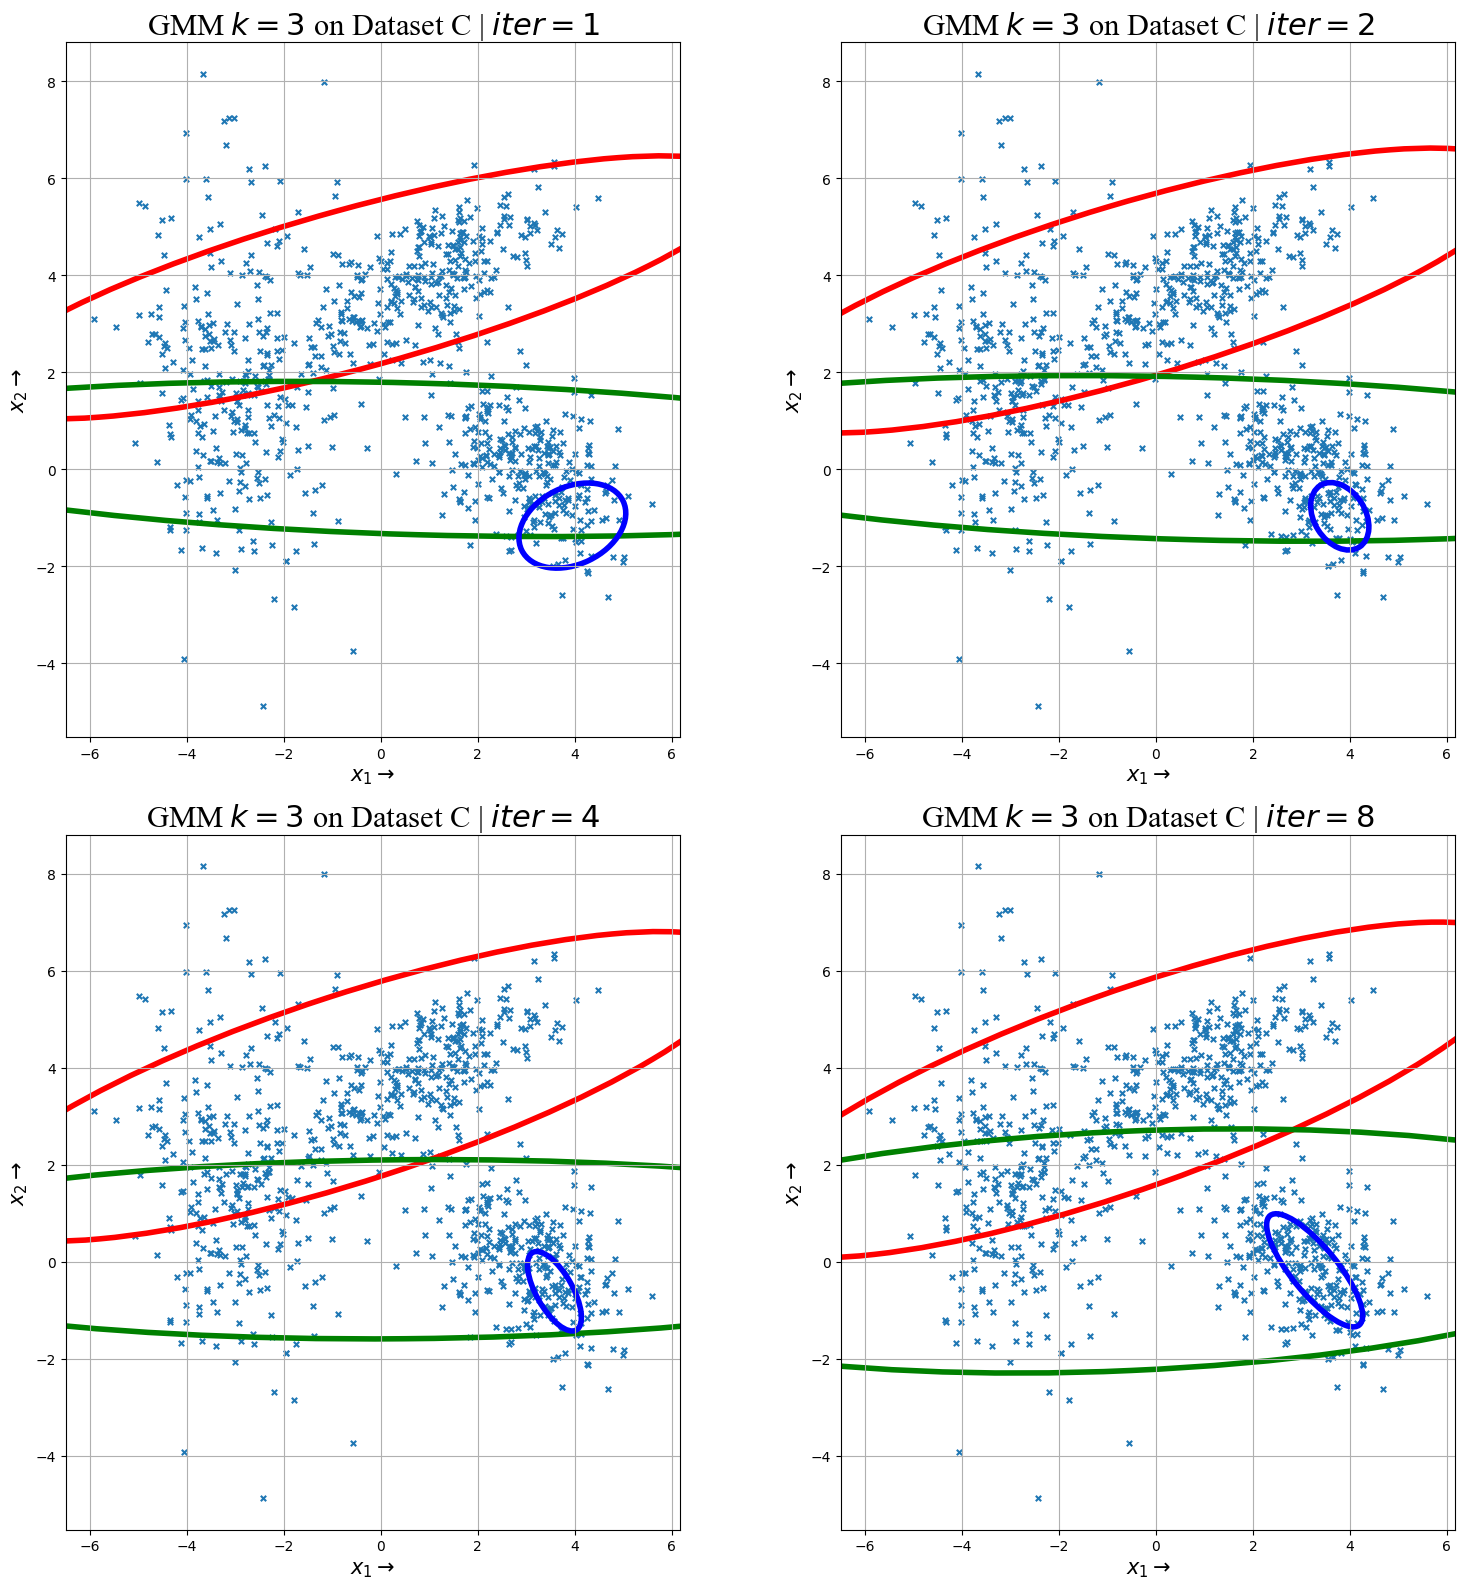

In [52]:
# Code write: Get the four plots with component contours here

f, ax = plt.subplots(2,2,figsize=[16,16])
for i,iter in enumerate([1,2,4,8]):
    t, mu, sig, log_like, bound = GMM_func(data_C, k=3, iter=iter)
    cur = ax[i//2][i%2]
    cur.grid('True')
    cur.scatter(data_C[:,0],data_C[:,1], s=15, marker='x')
    plot_ellipses_gmm(means=mu, covariances=sig, ax=cur)
    cur.set_title(f'GMM $ k=3 $ on Dataset C | $iter={iter}$', font='Times New Roman', fontsize=22)
    cur.set_xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
    cur.set_ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
    cur.set_aspect('equal')
plt.tight_layout()
plt.show()

---

Observations:

1. Although none of the first 8 iterations seem exactly precise to what GMM on the dataset should achieve, I have confirmed that the 100th iteration perfectly coincides with what is expected.
2. After further analysis, it was found that the first iteration to accurately analyse the given data is iteration 30. Beyond this iteration, the means, covs and weights barely change.
3. As expected, the - Log Likelihood value is continuously decreasing with every iteration. Thus, we can confirm that it converges eventually.
4. As can be seen in the last graph, $L(q,\theta)$ is continuously increasing with iterations, and is always below the Log Likelihood value, as expected.
5. As can be observed, GMM is suitable for those datasets with multiple seoarate gaussian patterns within, and can provide accurate clustering too.


---